__This Lab Should Help Us Know:__

- What is the Binomial distribution and where do we use it?

- Parameters and properties of the Binomial distribution

- Distributions related to the Binomial distribution

- What is the Normal (Gaussian) distribution and where do we use it?

- Parameters and properties of the Normal distribution

- Simulating parameter value changes for statistical distributions

- Central Limit Theorem, if time permits


In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Binomial Distribution


### Two real-life scenarios:

**Scenario 1:** Nathan wants to calculate how many heads he would observe if he flipped a fair coin 15 times for an undergraduate probability class he is taking. 

**Scenario 2:** The 100-day survival probability (from diagnosis) for a certain disease is 42%. A certain medical center has 97 patients who have been diagnosed with the disease, and Jane (a medical specialist) wonders how many will survive for 100 days beyond their diagnosis.


A statistician would consider the trivial exercise of flipping coins for a class to be virtually the same problem as the 100 day survival scenario.  
Does this surprise you? 

The two problems share many features:

- First, the outcome (heads/tails, survived/did not survive) are binary in both cases. 

- Second, a probability is used to describe the chance of an “event”. In the two cases described, these probabilities are fixed (i.e. constant). We know in advance the probability of heads for a fair coin. The probability of surviving past 100 days is stated above as 42%, but usually this probability would not be known. 

- Finally, we will assume (for now) that the “trials” (i.e. the flips of the coin, the individual patients) are independent from one another. Briefly, independence means that if I know the outcome of some of the coin flips (or patient cases), this provides me no information about the as-of-yet unobserved cases.   
Does this seem like a realistic assumption for coin flips? Patients?

__More formally, in Binomial Experiments:__

1. The experiment consists of a sequence of $n$ identical trials.
2. Two outcomes are possible on each trial. We refer to one outcome as a success and the other outcome as a failure.
3. The probability of a success, denoted by $p$, does not change from trial to trial.
Consequently, the probability of a failure, denoted by $q = (1-p)$, does not change from trial to trial.
4. The trials are independent.

#### Definition of Binomial Distribution

For any binomial experiment we can define a random variable $X$ as the number of successes.  
The probability distributions of such random variable is called **Binomial Distribution**. 
&nbsp;

A binomial random variable along with its parameter, $n$, only take positive integral values.   
The parameter, $p$, however, is a continuous one, lying in the range $0 < p < 1$

The probability mass function of $X$ is given as:

$$ P[X = x] = \binom{n}{x}p^x(1-p)^{n-x} $$

The expectation (mean) is:
$$E[X] = np$$

And the variance is:
$$Var[X] = np(1-p)$$

#### Using python to work with the Binomial Distribution

Let's first check the [SciPy documentation for the Binomial Distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)



# Figuring out Nathan's coin flip problem:

$n = ?$  
$p = ?$

We want to know how many heads (successes) will turn up. What does that correspond to solving?

In [27]:
from scipy.stats import binom
import scipy.stats as stats
from math import sqrt

In [33]:
n = 15
p = .5

binom.rvs(n, p)

nathans_answer = binom.mean(n = n, p = p)
#binom.mean(n = n, p = p, loc = 0)
nathans_answer

7.5

What if Nathan wanted to know the probability of 8 heads turning up?

In [5]:
heads_8 = binom.pmf(k = 8, n = n, p = p)
heads_8

0.1963806152343757

In [37]:
#inverse of cdf
binom.ppf(q = 0.92, n = n, p = p)

10.0

In [ ]:
binom.rvs

Does that surpise you? Why is it not a higher value?  
Let's plot and find out.

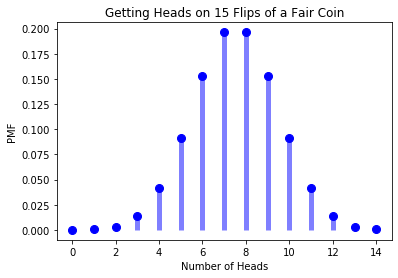

In [44]:
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(q = 0.000001, n = n, p = p),
               binom.ppf(q = 0.999999999, n = n, p = p))
ax.plot(x, binom.pmf(k = x, n = n, p = p), 'bo', ms = 8, label = 'binom pmf')
ax.vlines(x, 0, binom.pmf(k = x, n = n , p = p), colors = 'b', lw = 5, alpha = 0.5)
plt.xlabel("Number of Heads")
plt.ylabel("PMF")
plt.title("Getting Heads on 15 Flips of a Fair Coin")
plt.show()

This figure provides some clarity.   
We can use a different method to get similar information:

In [48]:
data_binom = np.random.binomial(n = n, p = p, size = 10000) # ---> Note that we are using NumPy here. Why?

In [49]:

binom.rvs(n = n, p = p, size = 10000)

array([8, 5, 9, ..., 9, 7, 9])

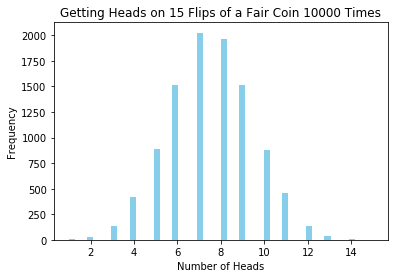

In [50]:
#Empirical binomial dist plot from np.random.binomial(n = n, p = p, size = 10000)
ax = sns.distplot(data_binom,
                  kde=False, # ---> what is this?
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Number of Heads', ylabel='Frequency')
plt.title("Getting Heads on 15 Flips of a Fair Coin 10000 Times")
plt.show()

What if Nathan wants to know the probability of getting at most 9 heads?  
We will need to use the cumulative distribution function.

In [18]:
at_most_9 = binom.cdf(k = 9, n = n, p = p)
at_most_9

0.8491210937499999

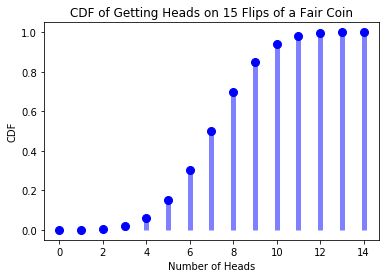

In [19]:
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(q = 0.00001, n = n, p = p),
               binom.ppf(q = 0.999999, n = n, p = p))
ax.plot(x, binom.cdf(k = x, n = n, p = p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.cdf(k = x, n = n, p = p), colors='b', lw=5, alpha=0.5)
plt.xlabel("Number of Heads")
plt.ylabel("CDF")
plt.title("CDF of Getting Heads on 15 Flips of a Fair Coin")
plt.show()

Now, help Jane find the probability that at least 35 patients will survive for 100 days.

Recall that:
$P[X \geq x] = 1 - P[X \leq x]$

In [20]:
janes_answer = 1 - binom.cdf(k = 35, n = 97, p = 0.42)
janes_answer

0.85971838388484

We will check this using a CDF plot.

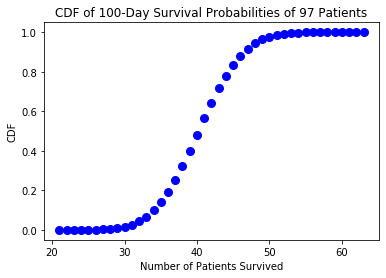

In [26]:
n = 97
p = 0.42
fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(0.00001, n, p),
               binom.ppf(0.999999, n, p))
ax.plot(x,  binom.cdf(k = x, n = n, p = p), 'bo', ms=8, label='binom pmf')
# ax.vlines(x, 0, binom.cdf(k = x, n = n, p = p), colors='b', lw=5, alpha=0.5)
plt.xlabel("Number of Patients Survived")
plt.ylabel("CDF")
plt.title("CDF of 100-Day Survival Probabilities of 97 Patients")
plt.show()

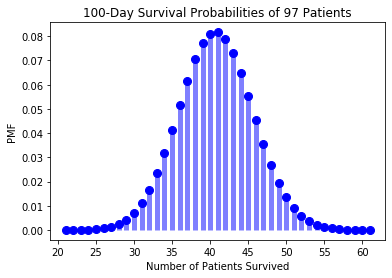

In [52]:
n = 97
p = 0.42

fig, ax = plt.subplots(1, 1)
x = np.arange(binom.ppf(q = 0.00001, n = n, p = p),
               binom.ppf(q = 0.99999, n = n, p = p))
ax.plot(x, binom.pmf(k = x, n = n, p = p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(k = x, n = n, p = p), colors='b', lw=5, alpha=0.5)
plt.xlabel("Number of Patients Survived")
plt.ylabel("PMF")
plt.title("100-Day Survival Probabilities of 97 Patients")
plt.show()

## Distributions related to the Binomial Distribution:

- **Bernoulli** - When there is only one trial, for e.g., only one flip of a coin.  
- **Multinomial** - When we have multiple possible outcomes with different probabilities of success associated with each, drawn _with_ replacement, for e.g., drawing balls of different colors from an urn with replacement.  
- **Hypergeometric** - When we have multiple possible outcomes with different probabilities of success associated with each, drawn _without_ replacement, for e.g., drawing balls of different colors from an urn without replacement.  
- **Poisson** - The Binomial distribution can be approximated by the Poisson distribution when $n \rightarrow \infty$ and $\lambda = np$ 
- **Normal** - The Binomial distribution can be approximated by the Normal distribution under very particular circumstances; this was useful when probabilities were calculated by hand, which is no longer an issue.  

## Normal Distribution

<img src="img/bell_shape.png" width="650">

&nbsp;
&nbsp; 

The Normal Distribution is one of the most important continuous probability distributions.   

**Why is it so popular?**  
Because several natural phenomena exhibit normality - heights and weights of people, test scores, scientific measurements, amounts of rainfall, etc.   
Not only this, one of the most useful applications of the Normal Distribution arises due to the **Central Limit Theorem**, making this distribution extremely important for statisticians and data scientists alike. 


The Gaussian random variable takes in all real-values, thus, its mean $\mu$ can also be any real-number.  
The standard-deviation $\sigma$, by definition, is a positive real number. 
That is, $-\infty < \mu < \infty $ and $ \sigma > 0 $

The Normal probability density function is given by:

$$ P[X = x] = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(x - \mu)^2}{2\sigma^2}} $$

The expectation (mean) is:
$$E[X] = \mu$$

And the variance is:
$$Var[X] = \sigma^2$$

### Some Nice Properties of the Normal Distribution:

- The entire family of normal distributions is differentiated by two parameters: the mean $\mu$ and the standard deviation $\sigma$.

- The mean, median, and the mode are the same value for any Gaussian random variable, found at the highest peak of the curve. This is due to the symmetric nature of the distribution.

- Normally distributed variables have 0 skew. 

- Empirical Law: 

    - Around 68% of the observations fall within one standard deviation of the mean, that is, between $ (\mu + \sigma) $ and $ (\mu - \sigma) $ .
    
    - Around 95% of the values fall within two standard deviations of the mean, that is, between $(\mu + 2\sigma)$ and $(\mu - 2\sigma)$ .
    
    - Around 99.7% of the values fall within three standard deviations of the mean, that is, between $(\mu + 3\sigma)$ and $(\mu - 3\sigma)$ .  
    
    - Thus, for a Normal distribution, almost all values lie within three standard deviations of the mean.   
    The six-sigma methodology is based exactly on this property.
    
- Standard deviation determines the 'steepness' of the distribution.

- The Standard Normal Distribution is a "squeezed" version of the Normal distribution, whose values have the mean subtracted and are divided by the standard deviation to obtain $\mu = 0$ and $\sigma^2 = 1$, by standardizing, we remove the SI unit of the random variable. 

Historically, transforming Gaussian distributed random variables to the standard Gaussian Distribution was the only way to obtain probabilities. Since there are an infinite number of members of the Gaussian family, tabulating all of the distributions is futile. We will momentarily see a transformation that centers the normal distribution at 0 and scales it to have variance 1. Since the transformation is applicable to any normally distributed random variable, this allowed people to create a single table of probabilities that could be used on any normal distribution. 


Consider the following example of IQ-scores:


<img src="img/iq_score.png" width="650">

### Understanding the parameters better

The mean $\mu$ is known as the location parameter, and  
The variance $\sigma^2$ is known as the scale parameter.  
Why are they called so?

This is an excellent (and fun!) [resource](https://seeing-theory.brown.edu/probability-distributions/index.html
) to improve our understanding of several statistical distributions. We will focus on the Normal distribution.

(Location and scale parameters are not unique to the Gaussian random variable.)

### Calculating Probabilities for the Normal Distribution

As for any continuous variable, if we want to find the probabilities coming from a normally distributed random variable $ Z $, we should calculate the area under the curve. Let's discuss the following cases:

In this example, we have a normal distribution with $\mu = 0$ and $\sigma = 1$. Here the area gives the probability that the random variable $Z$ is between $-0.5$ and $1.25$.

<img src="img/pdf_normal.png" width="650">


In this case, the shaded area gives the probability of $Z$ values that are smaller than $1$.
<img src="img/cdf_normal.png" width="650">

Using a similar method we can also easily find the probability of obtaining a $Z$-value of at least $1.58$.

<img src="img/normal_tail.png" width="650">

We see several differences between the way probabilities are calculated for discrete versus continuous distributions.   
However, using SciPy, the process of calculating probabilities is almost the same as that for the Binomial distribution!  

### A Very "Normal" Example

Consider the example where the heights of American women aged 18 to 24 is approximately normally distributed with mean 65.5 inches and standard deviation 2.5 inches (Moore and McCabe). What is the probability of finding women belonging to this age group whose heights are greater than 68 inches?

In [53]:
from scipy.stats import norm

[SciPy documentation for Normal Distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [54]:
mean = 65.5
std = 2.5
heights_68 = norm.cdf(68, mean, std)
heights_68

0.8413447460685429

Let's take a look at the distribution of heights:

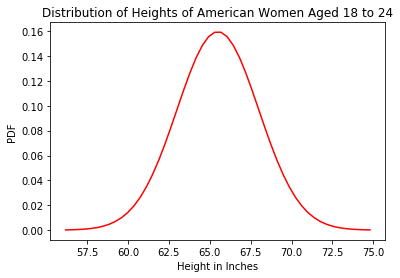

In [55]:
x = np.linspace(norm.ppf(0.0001, loc = mean, scale = std),
               norm.ppf(0.9999, loc = mean, scale = std))

fig, ax = plt.subplots(1, 1)
ax.plot(x, norm.pdf(x, loc = mean, scale = std), 'r-', ms=8, label='normal pdf')
plt.xlabel("Height in Inches")
plt.ylabel("PDF")
plt.title("Distribution of Heights of American Women Aged 18 to 24")
plt.show()

#### How does symmetry matter?

Find the probabilites (pdf) of the following for the heights in our example above:

1. $62.5$ inches
2. $68.5$ inches

In [63]:
height_625 = norm.pdf(62.5, mean, std)
height_685 = norm.pdf(68.5, mean, std)

print(height_625)
print(height_685)

0.0776744219932852
0.0776744219932852


### Aside - The Central Limit Theorem

![probgif](./img/probability-basics.gif)

You will learn in greater detail about sampling distributions and the CLT in future lectures!